# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

# Heart Attack Analysis & Prediction Dataset

### About this dataset

- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type:
 - Value 1: typical angina
 - Value 2: atypical angina
 - Value 3: non-anginal pain
 - Value 4: asymptomatic
    
- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

        - Value 0: normal
        - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved

- output : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
mpl.style.use('ggplot') 

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
# 303 rows and 14 columns

In [26]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [6]:
df.rename(columns = {'age':'Age', 'sex':'Sex',
                              'cp':'Chest pain type','trtbps':'Resting blood pressure',
                        'chol':'Serum cholestoral','fbs':'Fasting blood sugar',
                       'restecg':'Resting electrocardiographic results','thalachh':'Maximum heart rate','exng':'Exercise induced angina',
                        'oldpeak':'ST depression','slp':'slope of the peak exercise ST segment',
                       'caa':'No.of major vessels colored by flourosopy'}, inplace = True)

In [7]:
df.head()

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholestoral,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate,Exercise induced angina,ST depression,slope of the peak exercise ST segment,No.of major vessels colored by flourosopy,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [8]:
counts = df.nunique().sort_values(ascending=False)
counts

Serum cholestoral                            152
Maximum heart rate                            91
Resting blood pressure                        49
Age                                           41
ST depression                                 40
No.of major vessels colored by flourosopy      5
thall                                          4
Chest pain type                                4
slope of the peak exercise ST segment          3
Resting electrocardiographic results           3
output                                         2
Exercise induced angina                        2
Fasting blood sugar                            2
Sex                                            2
dtype: int64

In [9]:
# Serum cholestoral has the greatest number of distinct values

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [10]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [11]:
# there is one row with duplicated values

In [12]:
df[df.duplicated()]

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholestoral,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate,Exercise induced angina,ST depression,slope of the peak exercise ST segment,No.of major vessels colored by flourosopy,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
df[(df['Age']==38) & (df['Chest pain type']==2)]

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholestoral,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate,Exercise induced angina,ST depression,slope of the peak exercise ST segment,No.of major vessels colored by flourosopy,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [14]:
# row 164 has duplicated values

In [15]:
df.nunique()

Age                                           41
Sex                                            2
Chest pain type                                4
Resting blood pressure                        49
Serum cholestoral                            152
Fasting blood sugar                            2
Resting electrocardiographic results           3
Maximum heart rate                            91
Exercise induced angina                        2
ST depression                                 40
slope of the peak exercise ST segment          3
No.of major vessels colored by flourosopy      5
thall                                          4
output                                         2
dtype: int64

In [16]:
# all coumns have atleast 2 distinct values

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

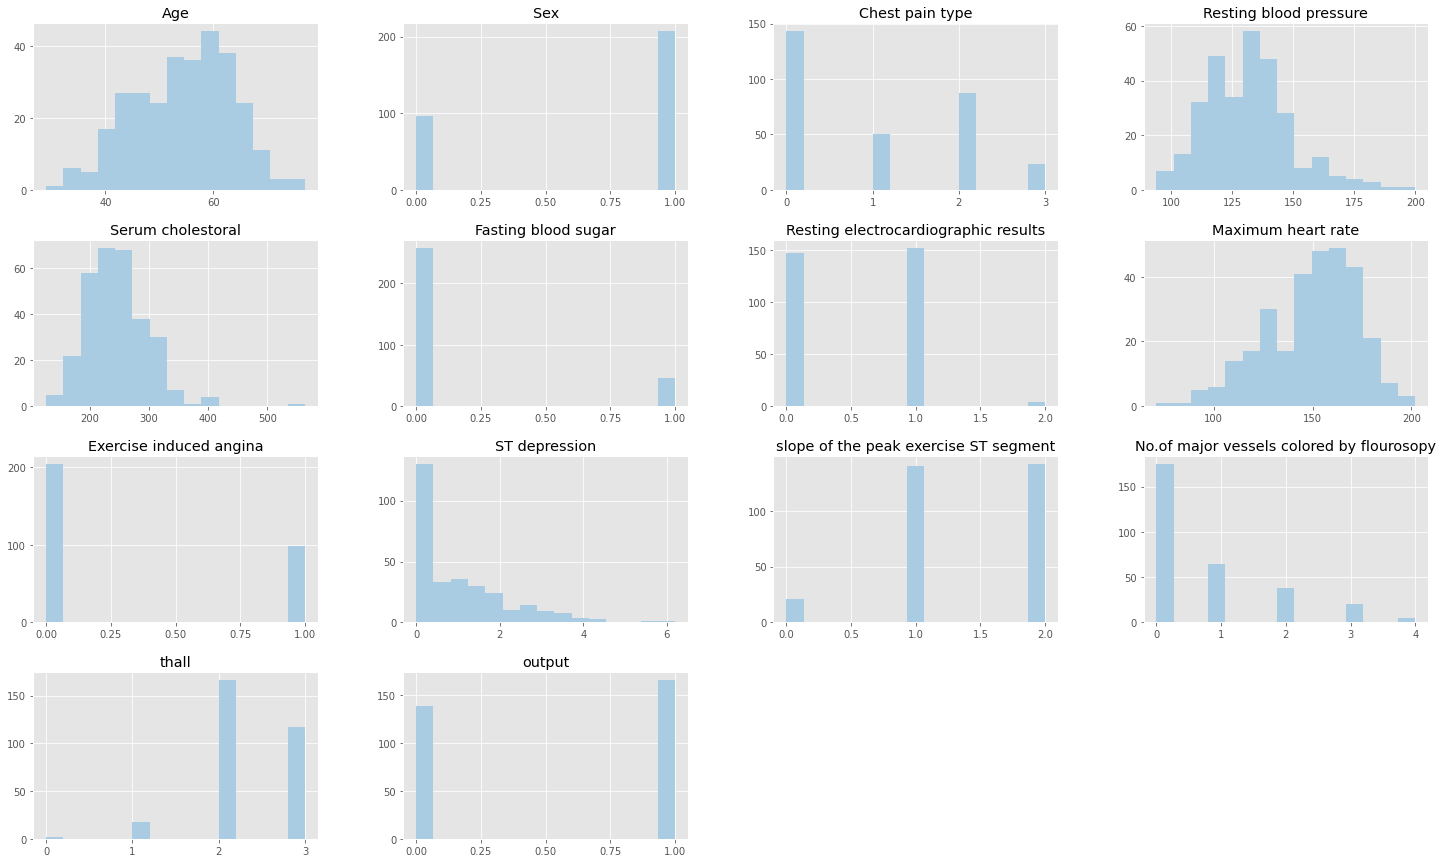

In [17]:
color = '#a9cce3'
df.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [18]:
df.corr()

,Age,Sex,Chest pain type,Resting blood pressure,Serum cholestoral,Fasting blood sugar,Resting electrocardiographic results,Maximum heart rate,Exercise induced angina,ST depression,slope of the peak exercise ST segment,No.of major vessels colored by flourosopy,thall,output
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Chest pain type,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Resting blood pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Serum cholestoral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fasting blood sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
Resting electrocardiographic results,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Maximum heart rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Exercise induced angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
ST depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


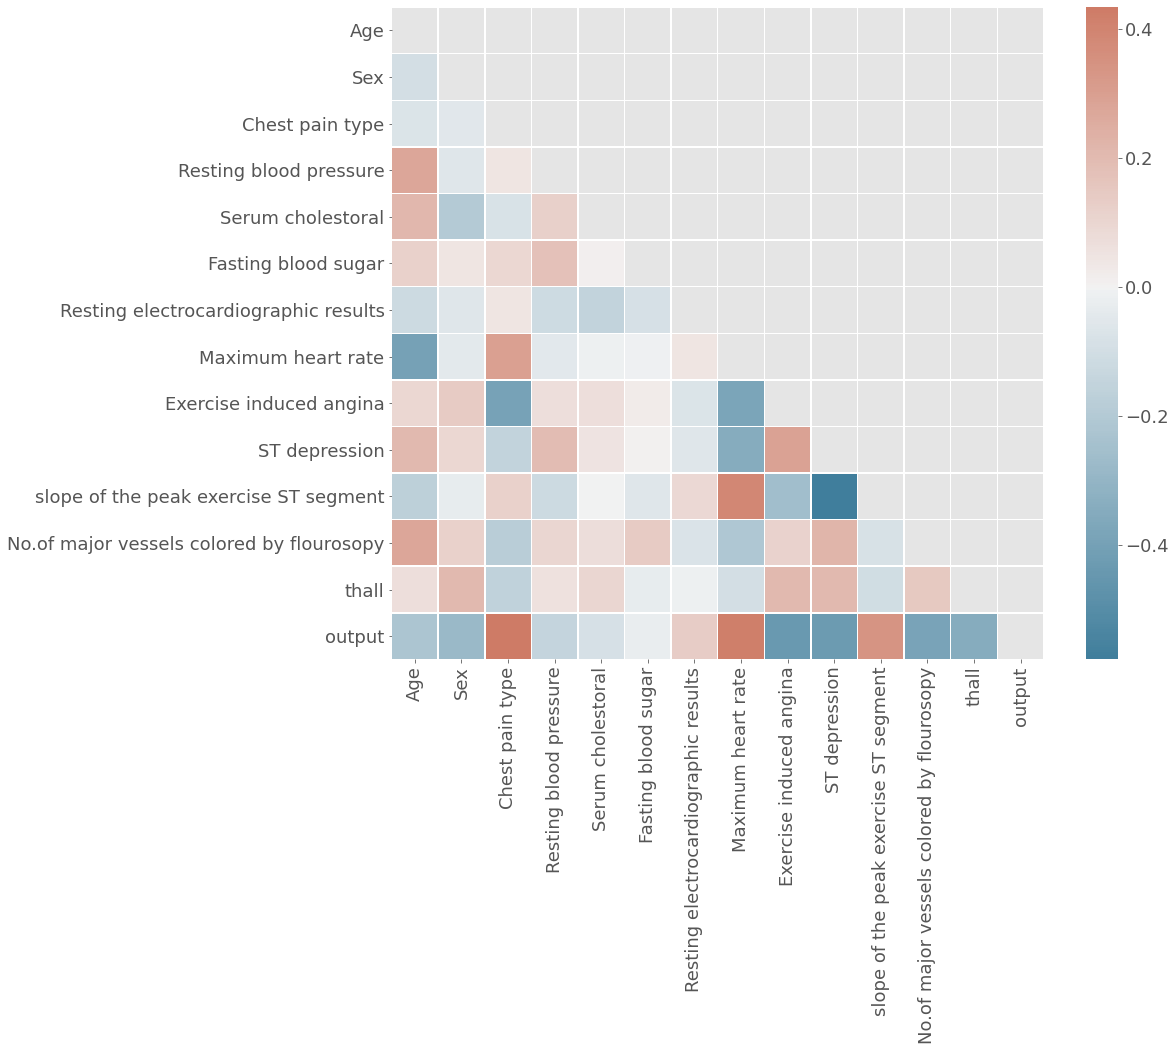

In [19]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask,linewidth=0.5,square=True,center=0)

In [20]:
# putting different kind of chest pain as a new column to see if we can find any higher correlation with output
dummy_variable = pd.get_dummies(df["Chest pain type"])
dummy_variable.head()

,0,1,2,3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [21]:
dummy_variable.rename(columns={0:'typical angina',1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'}, inplace=True)
dummy_variable.head()

,typical angina,atypical angina,non-anginal pain,asymptomatic
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [22]:
df = pd.concat([df, dummy_variable], axis=1)

In [23]:
df.corr()['output'].sort_values()

typical angina                              -0.516015
Exercise induced angina                     -0.436757
ST depression                               -0.430696
No.of major vessels colored by flourosopy   -0.391724
thall                                       -0.344029
Sex                                         -0.280937
Age                                         -0.225439
Resting blood pressure                      -0.144931
Serum cholestoral                           -0.085239
Fasting blood sugar                         -0.028046
asymptomatic                                 0.086957
Resting electrocardiographic results         0.137230
atypical angina                              0.245879
non-anginal pain                             0.316742
slope of the peak exercise ST segment        0.345877
Maximum heart rate                           0.421741
Chest pain type                              0.433798
output                                       1.000000
Name: output, dtype: float64

In [27]:
#  conclusion:
#  Here we can see typical angina chest pain has the highest negative correlation with output and
#  Chest pain type has the highest positive correlation with output
#  among all columns chest pain is a better indicator for the output(chance of heart attack)



---



## Submitting Your Work

Submit your work as usual.